In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import copy

import numpy as np
import gym
import gym_keygrid
import pandas as pd

import matplotlib.pyplot as plt

/home/rmapkay/aya_env/lib64/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [2]:
import sys
sys.path.insert(1, "../")

In [3]:
from rl_research.utils import plot_policy, plot_states, plot_qtables, plot_state_freq, plot_scores

### Environment and Optimal Value Function

In [4]:
env = gym.make('keygrid-v1', grid_length=4)
env.render()

You are using the KeyGrid2d environment with length 4


/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/rmapkay/Alex_env2/lib64/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/rmapka

ResetNeeded: Cannot call `env.render()` before calling `env.reset()`, if this is a intended action, set `disable_render_order_enforcing=True` on the OrderEnforcer wrapper.

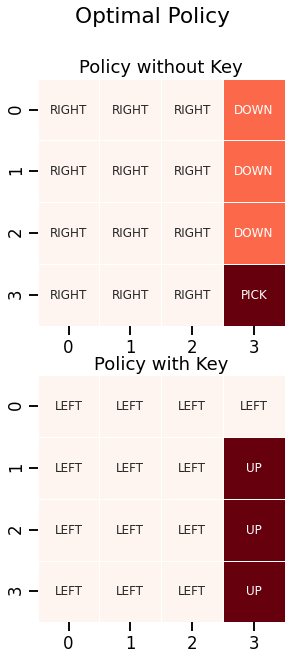

In [8]:
plot_policy(env, env.opt_policy, title="Optimal Policy")

### REINFORCE

In [10]:
from rl_research.algorithms.reinforce_baseline import train
L = 500
logs = True

In [11]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.2  0.2  0.2  0.2  0.19]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(0, 2, 0) probas:  [0.2  0.2  0.19 0.2  0.21]
(0, 2, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(0, 3, 0) probas:  [0.21 0.2  0.19 0.19 0.21]
(0, 3, 1) probas:  [0.2  0.2  0.2  0.19 0.2 ]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.2  0.2  0.2  0.2  0.19]
(1, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 1, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(1, 2, 0) probas:  [0.2  0.2  0.2  0.2  0.21]
(1, 2, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(1, 3, 0) probas:  [0.21 0.2  0.19 0.19 0.21]
(1, 3, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(2, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(2, 0, 1) probas:  [0.2  0.2  0.21 0.2  0.19]
(2, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(2, 1, 1) probas:  [0.2


Iteration:  45
Score: 0
% of visited states: 62.5%

Iteration:  46
Score: 0
% of visited states: 62.5%

Iteration:  47
Score: 0
% of visited states: 62.5%

Iteration:  48
Score: 0
% of visited states: 62.5%

Iteration:  49
Score: 0
% of visited states: 62.5%

Iteration:  50
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.2  0.2  0.2  0.2  0.19]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(0, 2, 0) probas:  [0.2  0.2  0.19 0.2  0.21]
(0, 2, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(0, 3, 0) probas:  [0.21 0.2  0.19 0.19 0.21]
(0, 3, 1) probas:  [0.2  0.2  0.2  0.19 0.2 ]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.2  0.2  0.2  0.2  0.19]
(1, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 1, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(1, 2, 0) probas:  [0.2  0.2  0.2  0.2  0.21]
(1, 2, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(1, 3, 0) probas:  [0.21 0.2  0.19 0.19 0.21]
(1, 3, 1) probas:  [0.2  0.21 0.2  0.19 0.2 ]
(2, 0, 0


Iteration:  102
Score: 0
% of visited states: 84.4%

Iteration:  103
Score: 0
% of visited states: 84.4%

Iteration:  104
Score: 0
% of visited states: 84.4%

Iteration:  105
Score: 0
% of visited states: 84.4%

Iteration:  106
Score: 0
% of visited states: 90.6%

Iteration:  107
Score: 0
% of visited states: 90.6%

Iteration:  108
Score: 0
% of visited states: 90.6%

Iteration:  109
Score: 0
% of visited states: 93.8%

Iteration:  110
(0, 0, 0) probas:  [0.19 0.21 0.19 0.22 0.19]
(0, 0, 1) probas:  [0.2  0.23 0.18 0.21 0.17]
(0, 1, 0) probas:  [0.19 0.21 0.2  0.22 0.18]
(0, 1, 1) probas:  [0.2  0.24 0.18 0.2  0.18]
(0, 2, 0) probas:  [0.18 0.22 0.19 0.22 0.18]
(0, 2, 1) probas:  [0.19 0.25 0.18 0.2  0.18]
(0, 3, 0) probas:  [0.18 0.22 0.19 0.23 0.18]
(0, 3, 1) probas:  [0.19 0.25 0.18 0.21 0.18]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.22 0.18]
(1, 0, 1) probas:  [0.2  0.23 0.18 0.21 0.17]
(1, 1, 0) probas:  [0.18 0.21 0.19 0.23 0.18]
(1, 1, 1) probas:  [0.2  0.24 0.18 0.21 0.17]
(1, 2, 


Iteration:  161
Score: 0
% of visited states: 96.9%

Iteration:  162
Score: 0
% of visited states: 96.9%

Iteration:  163
Score: 0
% of visited states: 96.9%

Iteration:  164
Score: 0
% of visited states: 96.9%

Iteration:  165
Score: 0
% of visited states: 96.9%

Iteration:  166
Score: 0
% of visited states: 96.9%

Iteration:  167
Score: 0
% of visited states: 96.9%

Iteration:  168
Score: 0
% of visited states: 96.9%

Iteration:  169
Score: 0
% of visited states: 96.9%

Iteration:  170
(0, 0, 0) probas:  [0.19 0.21 0.19 0.22 0.19]
(0, 0, 1) probas:  [0.2  0.23 0.18 0.21 0.17]
(0, 1, 0) probas:  [0.19 0.22 0.19 0.22 0.18]
(0, 1, 1) probas:  [0.2  0.24 0.18 0.2  0.17]
(0, 2, 0) probas:  [0.19 0.22 0.19 0.22 0.18]
(0, 2, 1) probas:  [0.2  0.25 0.18 0.2  0.18]
(0, 3, 0) probas:  [0.19 0.22 0.19 0.22 0.18]
(0, 3, 1) probas:  [0.19 0.25 0.18 0.21 0.17]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.22 0.18]
(1, 0, 1) probas:  [0.2  0.23 0.18 0.21 0.17]
(1, 1, 0) probas:  [0.19 0.21 0.19 0.23 0.18]



Iteration:  214
Score: 0
% of visited states: 100.0%

Iteration:  215
Score: 0
% of visited states: 100.0%

Iteration:  216
Score: 0
% of visited states: 100.0%

Iteration:  217
Score: 0
% of visited states: 100.0%

Iteration:  218
Score: 0
% of visited states: 100.0%

Iteration:  219
Score: 0
% of visited states: 100.0%

Iteration:  220
(0, 0, 0) probas:  [0.19 0.21 0.2  0.22 0.18]
(0, 0, 1) probas:  [0.21 0.24 0.18 0.21 0.16]
(0, 1, 0) probas:  [0.19 0.21 0.2  0.23 0.17]
(0, 1, 1) probas:  [0.21 0.25 0.18 0.21 0.16]
(0, 2, 0) probas:  [0.18 0.21 0.2  0.23 0.17]
(0, 2, 1) probas:  [0.2  0.25 0.18 0.21 0.16]
(0, 3, 0) probas:  [0.18 0.21 0.21 0.24 0.16]
(0, 3, 1) probas:  [0.19 0.25 0.18 0.21 0.16]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.23 0.17]
(1, 0, 1) probas:  [0.21 0.23 0.18 0.22 0.16]
(1, 1, 0) probas:  [0.19 0.21 0.21 0.23 0.17]
(1, 1, 1) probas:  [0.21 0.24 0.18 0.21 0.16]
(1, 2, 0) probas:  [0.18 0.21 0.21 0.24 0.16]
(1, 2, 1) probas:  [0.2  0.25 0.18 0.21 0.16]
(1, 3, 0) proba

Score: 0
% of visited states: 100.0%

Iteration:  263
Score: 0
% of visited states: 100.0%

Iteration:  264
Score: 0
% of visited states: 100.0%

Iteration:  265
Score: 0
% of visited states: 100.0%

Iteration:  266
Score: 0
% of visited states: 100.0%

Iteration:  267
Score: 0
% of visited states: 100.0%

Iteration:  268
Score: 0
% of visited states: 100.0%

Iteration:  269
Score: 0
% of visited states: 100.0%

Iteration:  270
(0, 0, 0) probas:  [0.19 0.21 0.2  0.22 0.18]
(0, 0, 1) probas:  [0.21 0.24 0.18 0.21 0.16]
(0, 1, 0) probas:  [0.19 0.21 0.2  0.23 0.17]
(0, 1, 1) probas:  [0.21 0.25 0.18 0.21 0.16]
(0, 2, 0) probas:  [0.18 0.21 0.2  0.23 0.17]
(0, 2, 1) probas:  [0.2  0.25 0.18 0.21 0.16]
(0, 3, 0) probas:  [0.18 0.21 0.21 0.24 0.16]
(0, 3, 1) probas:  [0.19 0.25 0.18 0.21 0.16]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.23 0.17]
(1, 0, 1) probas:  [0.21 0.23 0.18 0.22 0.16]
(1, 1, 0) probas:  [0.19 0.21 0.21 0.23 0.17]
(1, 1, 1) probas:  [0.21 0.24 0.18 0.21 0.16]
(1, 2, 0) probas

Score: 0
% of visited states: 100.0%

Iteration:  318
Score: 0
% of visited states: 100.0%

Iteration:  319
Score: 0
% of visited states: 100.0%

Iteration:  320
(0, 0, 0) probas:  [0.19 0.21 0.2  0.22 0.18]
(0, 0, 1) probas:  [0.21 0.24 0.18 0.21 0.16]
(0, 1, 0) probas:  [0.19 0.21 0.2  0.23 0.17]
(0, 1, 1) probas:  [0.21 0.25 0.18 0.21 0.16]
(0, 2, 0) probas:  [0.18 0.21 0.2  0.23 0.17]
(0, 2, 1) probas:  [0.2  0.25 0.18 0.21 0.16]
(0, 3, 0) probas:  [0.18 0.21 0.21 0.24 0.16]
(0, 3, 1) probas:  [0.2  0.25 0.18 0.21 0.16]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.23 0.17]
(1, 0, 1) probas:  [0.21 0.23 0.18 0.22 0.16]
(1, 1, 0) probas:  [0.19 0.21 0.21 0.23 0.17]
(1, 1, 1) probas:  [0.21 0.25 0.18 0.21 0.16]
(1, 2, 0) probas:  [0.18 0.21 0.21 0.24 0.16]
(1, 2, 1) probas:  [0.2  0.25 0.18 0.21 0.16]
(1, 3, 0) probas:  [0.18 0.21 0.21 0.24 0.16]
(1, 3, 1) probas:  [0.2  0.25 0.18 0.21 0.15]
(2, 0, 0) probas:  [0.19 0.21 0.21 0.23 0.17]
(2, 0, 1) probas:  [0.21 0.23 0.18 0.22 0.15]
(2, 1, 0) 

Score: 0
% of visited states: 100.0%

Iteration:  366
Score: 0
% of visited states: 100.0%

Iteration:  367
Score: 0
% of visited states: 100.0%

Iteration:  368
Score: 0
% of visited states: 100.0%

Iteration:  369
Score: 0
% of visited states: 100.0%

Iteration:  370
(0, 0, 0) probas:  [0.19 0.21 0.2  0.21 0.19]
(0, 0, 1) probas:  [0.21 0.25 0.18 0.19 0.17]
(0, 1, 0) probas:  [0.18 0.22 0.2  0.21 0.18]
(0, 1, 1) probas:  [0.21 0.26 0.18 0.18 0.18]
(0, 2, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(0, 2, 1) probas:  [0.2  0.27 0.18 0.18 0.18]
(0, 3, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(0, 3, 1) probas:  [0.2  0.27 0.18 0.18 0.17]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.21 0.19]
(1, 0, 1) probas:  [0.22 0.25 0.18 0.18 0.17]
(1, 1, 0) probas:  [0.18 0.21 0.21 0.21 0.18]
(1, 1, 1) probas:  [0.21 0.26 0.17 0.18 0.17]
(1, 2, 0) probas:  [0.18 0.21 0.21 0.21 0.18]
(1, 2, 1) probas:  [0.21 0.27 0.17 0.18 0.17]
(1, 3, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(1, 3, 1) probas:  [0.2  0.27 0.18 0.18 

Score: 0
% of visited states: 100.0%

Iteration:  416
Score: 0
% of visited states: 100.0%

Iteration:  417
Score: 0
% of visited states: 100.0%

Iteration:  418
Score: 0
% of visited states: 100.0%

Iteration:  419
Score: 0
% of visited states: 100.0%

Iteration:  420
(0, 0, 0) probas:  [0.19 0.21 0.2  0.21 0.19]
(0, 0, 1) probas:  [0.21 0.25 0.18 0.19 0.17]
(0, 1, 0) probas:  [0.18 0.22 0.2  0.21 0.18]
(0, 1, 1) probas:  [0.21 0.26 0.18 0.18 0.18]
(0, 2, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(0, 2, 1) probas:  [0.2  0.27 0.18 0.18 0.18]
(0, 3, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(0, 3, 1) probas:  [0.2  0.27 0.18 0.18 0.17]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.21 0.19]
(1, 0, 1) probas:  [0.22 0.25 0.18 0.19 0.17]
(1, 1, 0) probas:  [0.18 0.21 0.21 0.21 0.18]
(1, 1, 1) probas:  [0.21 0.26 0.17 0.18 0.17]
(1, 2, 0) probas:  [0.18 0.21 0.21 0.21 0.18]
(1, 2, 1) probas:  [0.21 0.27 0.17 0.18 0.17]
(1, 3, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(1, 3, 1) probas:  [0.2  0.27 0.18 0.18 

Score: 0
% of visited states: 100.0%

Iteration:  470
(0, 0, 0) probas:  [0.19 0.21 0.2  0.21 0.19]
(0, 0, 1) probas:  [0.21 0.25 0.18 0.19 0.17]
(0, 1, 0) probas:  [0.18 0.22 0.2  0.21 0.18]
(0, 1, 1) probas:  [0.21 0.26 0.18 0.18 0.18]
(0, 2, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(0, 2, 1) probas:  [0.2  0.27 0.18 0.18 0.18]
(0, 3, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(0, 3, 1) probas:  [0.2  0.27 0.18 0.18 0.17]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.21 0.19]
(1, 0, 1) probas:  [0.22 0.25 0.18 0.18 0.17]
(1, 1, 0) probas:  [0.18 0.21 0.21 0.21 0.18]
(1, 1, 1) probas:  [0.21 0.26 0.17 0.18 0.17]
(1, 2, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(1, 2, 1) probas:  [0.21 0.27 0.17 0.18 0.17]
(1, 3, 0) probas:  [0.18 0.22 0.21 0.21 0.18]
(1, 3, 1) probas:  [0.2  0.27 0.18 0.18 0.17]
(2, 0, 0) probas:  [0.19 0.21 0.2  0.21 0.18]
(2, 0, 1) probas:  [0.22 0.25 0.18 0.19 0.17]
(2, 1, 0) probas:  [0.18 0.21 0.21 0.22 0.18]
(2, 1, 1) probas:  [0.22 0.26 0.18 0.18 0.17]
(2, 2, 0) probas:  [0.18 0

<Figure size 720x360 with 0 Axes>

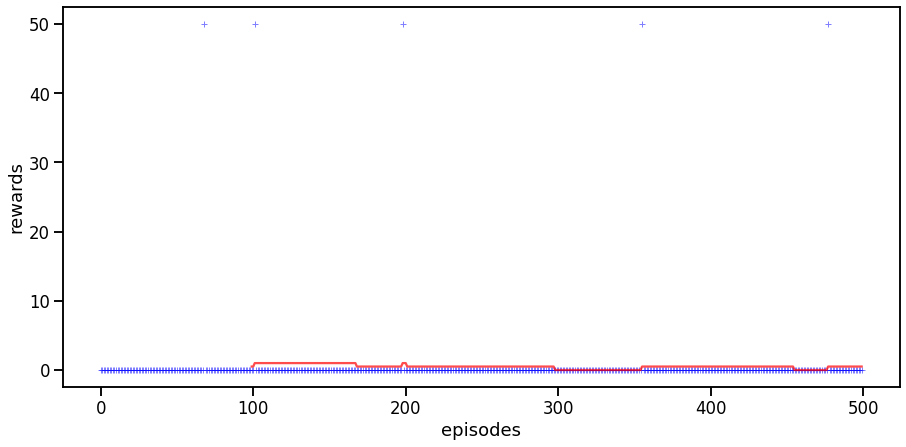

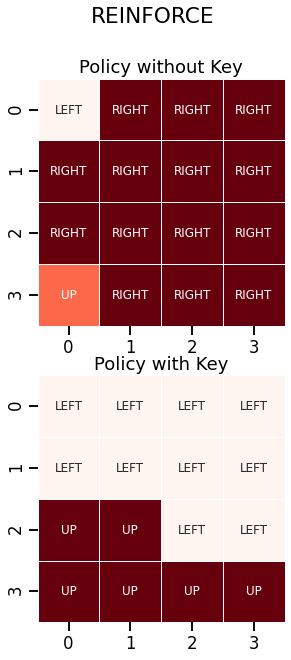

{(0,
  0,
  0): array([0.20670454, 0.20252195, 0.20382588, 0.20108567, 0.18586192],
       dtype=float32),
 (0,
  0,
  1): array([0.2528784 , 0.23666081, 0.17678447, 0.16584514, 0.16783111],
       dtype=float32),
 (0,
  1,
  0): array([0.20020305, 0.20599899, 0.20663488, 0.204774  , 0.18238916],
       dtype=float32),
 (0,
  1,
  1): array([0.24989603, 0.2484913 , 0.17306182, 0.15929796, 0.16925289],
       dtype=float32),
 (0,
  2,
  0): array([0.19694434, 0.20887369, 0.20890114, 0.20581803, 0.1794629 ],
       dtype=float32),
 (0,
  2,
  1): array([0.2429584 , 0.25777867, 0.17230561, 0.1569984 , 0.16995898],
       dtype=float32),
 (0,
  3,
  0): array([0.19528255, 0.21141157, 0.21017885, 0.20571782, 0.1774092 ],
       dtype=float32),
 (0,
  3,
  1): array([0.23646507, 0.2618172 , 0.17552705, 0.15793759, 0.16825308],
       dtype=float32),
 (1,
  0,
  0): array([0.20271142, 0.19594514, 0.2131209 , 0.20930082, 0.17892171],
       dtype=float32),
 (1,
  0,
  1): array([0.2591907 , 0.

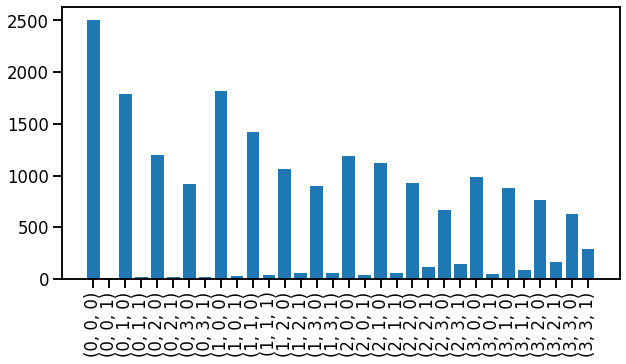

In [12]:
plot_scores(agent.scores)
agent.get_policy()
plot_policy(env, agent.pi, "REINFORCE")
plot_state_freq(agent.state_freq)
agent.get_proba()

### Reinforce count state exploration

In [14]:
from rl_research.algorithms.reinforce_count_states import train

In [15]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.18 0.22 0.2  0.2  0.2 ]
(0, 1, 0) probas:  [0.19 0.21 0.2  0.21 0.2 ]
(0, 1, 1) probas:  [0.17 0.23 0.2  0.2  0.2 ]
(0, 2, 0) probas:  [0.19 0.21 0.19 0.22 0.19]
(0, 2, 1) probas:  [0.16 0.23 0.19 0.21 0.2 ]
(0, 3, 0) probas:  [0.18 0.22 0.19 0.23 0.19]
(0, 3, 1) probas:  [0.16 0.24 0.19 0.22 0.19]
(1, 0, 0) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(1, 0, 1) probas:  [0.18 0.22 0.2  0.2  0.21]
(1, 1, 0) probas:  [0.19 0.21 0.19 0.21 0.2 ]
(1, 1, 1) probas:  [0.17 0.22 0.19 0.21 0.21]
(1, 2, 0) probas:  [0.19 0.22 0.19 0.21 0.19]
(1, 2, 1) probas:  [0.17 0.23 0.19 0.22 0.2 ]
(1, 3, 0) probas:  [0.18 0.22 0.18 0.22 0.19]
(1, 3, 1) probas:  [0.16 0.23 0.19 0.22 0.2 ]
(2, 0, 0) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(2, 0, 1) probas:  [0.17 0.22 0.19 0.21 0.21]
(2, 1, 0) probas:  [0.19 0.22 0.19 0.2  0.2 


Iteration:  55
Score: 0
% of visited states: 84.4%

Iteration:  56
Score: 0
% of visited states: 84.4%

Iteration:  57
Score: 0
% of visited states: 84.4%

Iteration:  58
Score: 0
% of visited states: 84.4%

Iteration:  59
Score: 0
% of visited states: 84.4%

Iteration:  60
(0, 0, 0) probas:  [0.2  0.19 0.21 0.19 0.2 ]
(0, 0, 1) probas:  [0.18 0.21 0.22 0.19 0.2 ]
(0, 1, 0) probas:  [0.19 0.2  0.22 0.2  0.19]
(0, 1, 1) probas:  [0.17 0.22 0.22 0.19 0.2 ]
(0, 2, 0) probas:  [0.19 0.2  0.22 0.21 0.19]
(0, 2, 1) probas:  [0.17 0.22 0.22 0.2  0.2 ]
(0, 3, 0) probas:  [0.18 0.21 0.21 0.21 0.18]
(0, 3, 1) probas:  [0.16 0.22 0.22 0.21 0.19]
(1, 0, 0) probas:  [0.2  0.2  0.21 0.19 0.2 ]
(1, 0, 1) probas:  [0.18 0.21 0.21 0.19 0.21]
(1, 1, 0) probas:  [0.19 0.2  0.22 0.2  0.2 ]
(1, 1, 1) probas:  [0.17 0.21 0.22 0.2  0.2 ]
(1, 2, 0) probas:  [0.19 0.2  0.21 0.2  0.19]
(1, 2, 1) probas:  [0.17 0.22 0.21 0.2  0.2 ]
(1, 3, 0) probas:  [0.18 0.21 0.21 0.21 0.19]
(1, 3, 1) probas:  [0.16 0.22 0.21

Score: 0
% of visited states: 90.6%

Iteration:  112
Score: 0
% of visited states: 90.6%

Iteration:  113
Score: 0
% of visited states: 90.6%

Iteration:  114
Score: 0
% of visited states: 90.6%

Iteration:  115
Score: 0
% of visited states: 90.6%

Iteration:  116
Score: 0
% of visited states: 90.6%

Iteration:  117
Score: 0
% of visited states: 90.6%

Iteration:  118
Score: 0
% of visited states: 90.6%

Iteration:  119
Score: 0
% of visited states: 90.6%

Iteration:  120
(0, 0, 0) probas:  [0.18 0.22 0.2  0.2  0.2 ]
(0, 0, 1) probas:  [0.15 0.27 0.2  0.18 0.19]
(0, 1, 0) probas:  [0.16 0.23 0.2  0.21 0.19]
(0, 1, 1) probas:  [0.14 0.28 0.2  0.19 0.19]
(0, 2, 0) probas:  [0.15 0.24 0.2  0.22 0.19]
(0, 2, 1) probas:  [0.13 0.29 0.2  0.19 0.19]
(0, 3, 0) probas:  [0.14 0.25 0.2  0.22 0.18]
(0, 3, 1) probas:  [0.12 0.3  0.2  0.2  0.19]
(1, 0, 0) probas:  [0.17 0.23 0.2  0.2  0.2 ]
(1, 0, 1) probas:  [0.15 0.27 0.19 0.19 0.19]
(1, 1, 0) probas:  [0.16 0.24 0.2  0.21 0.2 ]
(1, 1, 1) probas:

Score: 0
% of visited states: 90.6%

Iteration:  161
Score: 0
% of visited states: 90.6%

Iteration:  162
Score: 0
% of visited states: 90.6%

Iteration:  163
Score: 0
% of visited states: 90.6%

Iteration:  164
Score: 0
% of visited states: 90.6%

Iteration:  165
Score: 0
% of visited states: 90.6%

Iteration:  166
Score: 0
% of visited states: 90.6%

Iteration:  167
Score: 0
% of visited states: 90.6%

Iteration:  168
Score: 0
% of visited states: 90.6%

Iteration:  169
Score: 0
% of visited states: 90.6%

Iteration:  170
(0, 0, 0) probas:  [0.18 0.22 0.2  0.2  0.2 ]
(0, 0, 1) probas:  [0.15 0.27 0.2  0.18 0.19]
(0, 1, 0) probas:  [0.17 0.22 0.2  0.21 0.2 ]
(0, 1, 1) probas:  [0.15 0.28 0.2  0.19 0.19]
(0, 2, 0) probas:  [0.15 0.23 0.2  0.22 0.19]
(0, 2, 1) probas:  [0.14 0.28 0.2  0.19 0.19]
(0, 3, 0) probas:  [0.14 0.25 0.2  0.22 0.19]
(0, 3, 1) probas:  [0.13 0.29 0.2  0.2  0.19]
(1, 0, 0) probas:  [0.17 0.23 0.2  0.2  0.2 ]
(1, 0, 1) probas:  [0.15 0.27 0.19 0.19 0.19]
(1, 1, 0) 

Score: 0
% of visited states: 90.6%

Iteration:  213
Score: 0
% of visited states: 90.6%

Iteration:  214
Score: 0
% of visited states: 90.6%

Iteration:  215
Score: 0
% of visited states: 90.6%

Iteration:  216
Score: 0
% of visited states: 90.6%

Iteration:  217
Score: 0
% of visited states: 90.6%

Iteration:  218
Score: 0
% of visited states: 90.6%

Iteration:  219
Score: 0
% of visited states: 90.6%

Iteration:  220
(0, 0, 0) probas:  [0.18 0.21 0.2  0.21 0.2 ]
(0, 0, 1) probas:  [0.16 0.27 0.2  0.19 0.2 ]
(0, 1, 0) probas:  [0.17 0.22 0.2  0.21 0.2 ]
(0, 1, 1) probas:  [0.15 0.27 0.19 0.19 0.19]
(0, 2, 0) probas:  [0.16 0.23 0.2  0.22 0.19]
(0, 2, 1) probas:  [0.14 0.28 0.19 0.19 0.19]
(0, 3, 0) probas:  [0.14 0.24 0.2  0.23 0.19]
(0, 3, 1) probas:  [0.13 0.29 0.19 0.2  0.19]
(1, 0, 0) probas:  [0.17 0.23 0.2  0.21 0.2 ]
(1, 0, 1) probas:  [0.16 0.27 0.19 0.19 0.2 ]
(1, 1, 0) probas:  [0.16 0.23 0.2  0.21 0.2 ]
(1, 1, 1) probas:  [0.15 0.28 0.19 0.19 0.19]
(1, 2, 0) probas:  [0.15

Score: 0
% of visited states: 90.6%

Iteration:  259
Score: 0
% of visited states: 90.6%

Iteration:  260
(0, 0, 0) probas:  [0.18 0.21 0.2  0.21 0.2 ]
(0, 0, 1) probas:  [0.16 0.26 0.19 0.19 0.19]
(0, 1, 0) probas:  [0.17 0.22 0.2  0.22 0.2 ]
(0, 1, 1) probas:  [0.15 0.27 0.19 0.19 0.19]
(0, 2, 0) probas:  [0.16 0.23 0.2  0.22 0.19]
(0, 2, 1) probas:  [0.14 0.28 0.19 0.2  0.19]
(0, 3, 0) probas:  [0.14 0.24 0.2  0.23 0.19]
(0, 3, 1) probas:  [0.13 0.28 0.19 0.21 0.19]
(1, 0, 0) probas:  [0.17 0.23 0.2  0.21 0.2 ]
(1, 0, 1) probas:  [0.16 0.27 0.19 0.2  0.19]
(1, 1, 0) probas:  [0.16 0.23 0.2  0.21 0.2 ]
(1, 1, 1) probas:  [0.15 0.27 0.19 0.2  0.19]
(1, 2, 0) probas:  [0.15 0.24 0.2  0.22 0.2 ]
(1, 2, 1) probas:  [0.14 0.28 0.19 0.2  0.19]
(1, 3, 0) probas:  [0.14 0.25 0.19 0.23 0.19]
(1, 3, 1) probas:  [0.13 0.29 0.19 0.21 0.19]
(2, 0, 0) probas:  [0.16 0.24 0.2  0.21 0.2 ]
(2, 0, 1) probas:  [0.15 0.27 0.18 0.2  0.19]
(2, 1, 0) probas:  [0.15 0.24 0.19 0.21 0.2 ]
(2, 1, 1) probas:  [


Iteration:  307
Score: 0
% of visited states: 100.0%

Iteration:  308
Score: 0
% of visited states: 100.0%

Iteration:  309
Score: 0
% of visited states: 100.0%

Iteration:  310
(0, 0, 0) probas:  [0.21 0.2  0.18 0.22 0.2 ]
(0, 0, 1) probas:  [0.22 0.24 0.14 0.19 0.2 ]
(0, 1, 0) probas:  [0.21 0.2  0.18 0.22 0.2 ]
(0, 1, 1) probas:  [0.22 0.25 0.14 0.18 0.2 ]
(0, 2, 0) probas:  [0.2  0.2  0.18 0.22 0.2 ]
(0, 2, 1) probas:  [0.22 0.24 0.14 0.19 0.21]
(0, 3, 0) probas:  [0.2  0.2  0.18 0.23 0.2 ]
(0, 3, 1) probas:  [0.22 0.24 0.14 0.19 0.21]
(1, 0, 0) probas:  [0.21 0.21 0.17 0.22 0.2 ]
(1, 0, 1) probas:  [0.23 0.24 0.14 0.19 0.2 ]
(1, 1, 0) probas:  [0.21 0.2  0.17 0.22 0.2 ]
(1, 1, 1) probas:  [0.23 0.24 0.13 0.19 0.2 ]
(1, 2, 0) probas:  [0.2  0.2  0.17 0.22 0.2 ]
(1, 2, 1) probas:  [0.23 0.24 0.13 0.19 0.21]
(1, 3, 0) probas:  [0.2  0.2  0.17 0.23 0.2 ]
(1, 3, 1) probas:  [0.23 0.24 0.13 0.19 0.21]
(2, 0, 0) probas:  [0.21 0.21 0.16 0.22 0.2 ]
(2, 0, 1) probas:  [0.23 0.23 0.13 0.2 

(2, 3, 0) probas:  [0.2  0.17 0.21 0.21 0.21]
(2, 3, 1) probas:  [0.24 0.21 0.17 0.17 0.21]
(3, 0, 0) probas:  [0.2  0.2  0.18 0.21 0.2 ]
(3, 0, 1) probas:  [0.24 0.22 0.16 0.19 0.19]
(3, 1, 0) probas:  [0.2  0.19 0.19 0.21 0.21]
(3, 1, 1) probas:  [0.24 0.21 0.16 0.18 0.2 ]
(3, 2, 0) probas:  [0.2  0.18 0.19 0.21 0.22]
(3, 2, 1) probas:  [0.24 0.21 0.16 0.18 0.21]
(3, 3, 0) probas:  [0.2  0.17 0.2  0.21 0.22]
(3, 3, 1) probas:  [0.24 0.21 0.17 0.17 0.21]
Score: 0
% of visited states: 100.0%

Iteration:  351
Score: 0
% of visited states: 100.0%

Iteration:  352
Score: 0
% of visited states: 100.0%

Iteration:  353
Score: 0
% of visited states: 100.0%

Iteration:  354
Score: 0
% of visited states: 100.0%

Iteration:  355
Score: 0
% of visited states: 100.0%

Iteration:  356
Score: 0
% of visited states: 100.0%

Iteration:  357
Score: 0
% of visited states: 100.0%

Iteration:  358
Score: 0
% of visited states: 100.0%

Iteration:  359
Score: 0
% of visited states: 100.0%

Iteration:  360



Iteration:  401
Score: 0
% of visited states: 100.0%

Iteration:  402
Score: 0
% of visited states: 100.0%

Iteration:  403
Score: 0
% of visited states: 100.0%

Iteration:  404
Score: 0
% of visited states: 100.0%

Iteration:  405
Score: 0
% of visited states: 100.0%

Iteration:  406
Score: 0
% of visited states: 100.0%

Iteration:  407
Score: 50
% of visited states: 100.0%

Iteration:  408
Score: 0
% of visited states: 100.0%

Iteration:  409
Score: 0
% of visited states: 100.0%

Iteration:  410
(0, 0, 0) probas:  [0.21 0.18 0.2  0.21 0.19]
(0, 0, 1) probas:  [0.24 0.23 0.18 0.16 0.2 ]
(0, 1, 0) probas:  [0.21 0.17 0.22 0.21 0.19]
(0, 1, 1) probas:  [0.24 0.23 0.18 0.15 0.2 ]
(0, 2, 0) probas:  [0.2  0.17 0.23 0.2  0.19]
(0, 2, 1) probas:  [0.24 0.22 0.18 0.15 0.2 ]
(0, 3, 0) probas:  [0.2  0.17 0.24 0.2  0.2 ]
(0, 3, 1) probas:  [0.23 0.22 0.19 0.15 0.21]
(1, 0, 0) probas:  [0.21 0.18 0.2  0.21 0.19]
(1, 0, 1) probas:  [0.25 0.22 0.17 0.16 0.2 ]
(1, 1, 0) probas:  [0.21 0.16 0.22 0


Iteration:  447
Score: 50
% of visited states: 100.0%

Iteration:  448
Score: 0
% of visited states: 100.0%

Iteration:  449
Score: 0
% of visited states: 100.0%

Iteration:  450
(0, 0, 0) probas:  [0.24 0.18 0.19 0.22 0.16]
(0, 0, 1) probas:  [0.3  0.24 0.15 0.17 0.14]
(0, 1, 0) probas:  [0.24 0.17 0.21 0.22 0.16]
(0, 1, 1) probas:  [0.31 0.25 0.15 0.16 0.14]
(0, 2, 0) probas:  [0.23 0.17 0.22 0.22 0.16]
(0, 2, 1) probas:  [0.32 0.24 0.15 0.16 0.13]
(0, 3, 0) probas:  [0.23 0.17 0.23 0.22 0.15]
(0, 3, 1) probas:  [0.32 0.24 0.15 0.16 0.13]
(1, 0, 0) probas:  [0.24 0.18 0.19 0.23 0.16]
(1, 0, 1) probas:  [0.31 0.23 0.14 0.17 0.14]
(1, 1, 0) probas:  [0.24 0.17 0.2  0.23 0.17]
(1, 1, 1) probas:  [0.32 0.23 0.14 0.17 0.14]
(1, 2, 0) probas:  [0.23 0.16 0.22 0.22 0.17]
(1, 2, 1) probas:  [0.33 0.23 0.14 0.16 0.13]
(1, 3, 0) probas:  [0.23 0.16 0.24 0.21 0.16]
(1, 3, 1) probas:  [0.33 0.23 0.15 0.16 0.13]
(2, 0, 0) probas:  [0.24 0.18 0.19 0.23 0.16]
(2, 0, 1) probas:  [0.32 0.22 0.14 0.1


****************************************************************************************************
TRAINING ENDED



<Figure size 720x360 with 0 Axes>

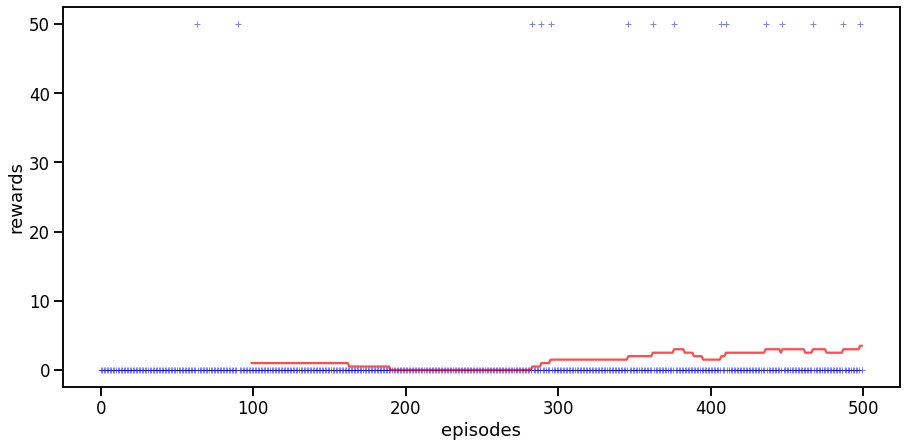

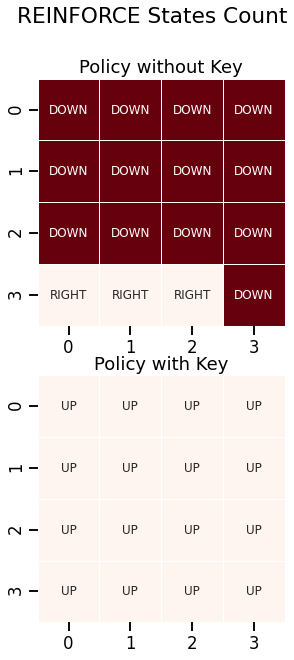

{(0,
  0,
  0): array([0.19389434, 0.20916581, 0.2002059 , 0.2357098 , 0.16102421],
       dtype=float32),
 (0,
  0,
  1): array([0.19689476, 0.34183556, 0.1467957 , 0.18135703, 0.13311692],
       dtype=float32),
 (0,
  1,
  0): array([0.18314458, 0.20719776, 0.2150762 , 0.2351132 , 0.15946826],
       dtype=float32),
 (0,
  1,
  1): array([0.19366819, 0.35941553, 0.14264165, 0.17491049, 0.12936416],
       dtype=float32),
 (0,
  2,
  0): array([0.1726731 , 0.20878467, 0.22717232, 0.23416474, 0.15720525],
       dtype=float32),
 (0,
  2,
  1): array([0.18858236, 0.36979315, 0.14152543, 0.17370544, 0.12639368],
       dtype=float32),
 (0,
  3,
  0): array([0.16257586, 0.21083216, 0.23805968, 0.23340993, 0.15512241],
       dtype=float32),
 (0,
  3,
  1): array([0.18154499, 0.37073097, 0.14691722, 0.1751605 , 0.12564631],
       dtype=float32),
 (1,
  0,
  0): array([0.18375336, 0.204762  , 0.20178793, 0.24630281, 0.16339387],
       dtype=float32),
 (1,
  0,
  1): array([0.2032251 , 0.

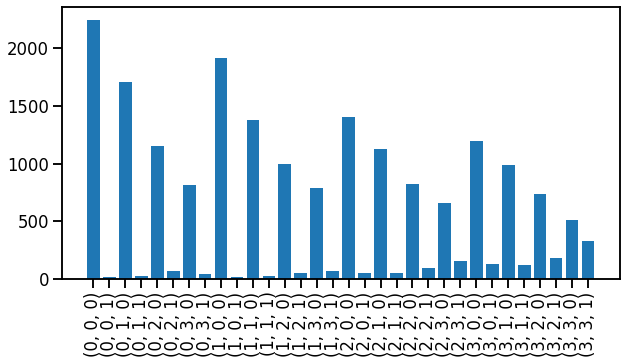

In [16]:
plot_scores(agent.scores)
agent.get_policy()
plot_policy(env, agent.pi, "REINFORCE States Count")
plot_state_freq(agent.state_freq)
agent.get_proba()

### Reinforce count seq exploration

In [18]:
from rl_research.algorithms.reinforce_count_seq import train

In [19]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.18 0.2  0.2  0.22 0.2 ]
(0, 1, 0) probas:  [0.2  0.2  0.2  0.21 0.2 ]
(0, 1, 1) probas:  [0.18 0.19 0.2  0.22 0.2 ]
(0, 2, 0) probas:  [0.19 0.2  0.2  0.21 0.2 ]
(0, 2, 1) probas:  [0.18 0.19 0.2  0.23 0.2 ]
(0, 3, 0) probas:  [0.19 0.2  0.19 0.22 0.2 ]
(0, 3, 1) probas:  [0.18 0.18 0.2  0.23 0.21]
(1, 0, 0) probas:  [0.2  0.21 0.2  0.2  0.2 ]
(1, 0, 1) probas:  [0.18 0.21 0.19 0.22 0.2 ]
(1, 1, 0) probas:  [0.19 0.2  0.2  0.2  0.2 ]
(1, 1, 1) probas:  [0.18 0.2  0.19 0.22 0.2 ]
(1, 2, 0) probas:  [0.19 0.2  0.2  0.21 0.2 ]
(1, 2, 1) probas:  [0.18 0.2  0.2  0.23 0.2 ]
(1, 3, 0) probas:  [0.19 0.2  0.2  0.21 0.2 ]
(1, 3, 1) probas:  [0.18 0.19 0.2  0.23 0.2 ]
(2, 0, 0) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(2, 0, 1) probas:  [0.18 0.22 0.19 0.21 0.2 ]
(2, 1, 0) probas:  [0.19 0.21 0.2  0.21 0.2 

Score: 0
% of visited states: 90.6%

Iteration:  53
Score: 0
% of visited states: 90.6%

Iteration:  54
Score: 0
% of visited states: 90.6%

Iteration:  55
Score: 0
% of visited states: 90.6%

Iteration:  56
Score: 0
% of visited states: 90.6%

Iteration:  57
Score: 0
% of visited states: 90.6%

Iteration:  58
Score: 0
% of visited states: 90.6%

Iteration:  59
Score: 0
% of visited states: 90.6%

Iteration:  60
(0, 0, 0) probas:  [0.19 0.2  0.22 0.21 0.19]
(0, 0, 1) probas:  [0.17 0.19 0.22 0.23 0.18]
(0, 1, 0) probas:  [0.18 0.2  0.22 0.22 0.18]
(0, 1, 1) probas:  [0.17 0.19 0.22 0.24 0.18]
(0, 2, 0) probas:  [0.18 0.2  0.22 0.22 0.18]
(0, 2, 1) probas:  [0.17 0.18 0.22 0.24 0.18]
(0, 3, 0) probas:  [0.17 0.19 0.22 0.23 0.18]
(0, 3, 1) probas:  [0.17 0.18 0.22 0.24 0.19]
(1, 0, 0) probas:  [0.18 0.2  0.22 0.21 0.18]
(1, 0, 1) probas:  [0.17 0.2  0.21 0.23 0.18]
(1, 1, 0) probas:  [0.18 0.2  0.22 0.22 0.18]
(1, 1, 1) probas:  [0.17 0.2  0.21 0.24 0.18]
(1, 2, 0) probas:  [0.18 0.2  0.

Score: 0
% of visited states: 96.9%

Iteration:  102
Score: 0
% of visited states: 96.9%

Iteration:  103
Score: 0
% of visited states: 96.9%

Iteration:  104
Score: 0
% of visited states: 96.9%

Iteration:  105
Score: 0
% of visited states: 96.9%

Iteration:  106
Score: 0
% of visited states: 96.9%

Iteration:  107
Score: 0
% of visited states: 96.9%

Iteration:  108
Score: 0
% of visited states: 96.9%

Iteration:  109
Score: 0
% of visited states: 96.9%

Iteration:  110
(0, 0, 0) probas:  [0.19 0.18 0.23 0.22 0.18]
(0, 0, 1) probas:  [0.19 0.2  0.22 0.23 0.17]
(0, 1, 0) probas:  [0.19 0.18 0.24 0.22 0.18]
(0, 1, 1) probas:  [0.19 0.19 0.22 0.23 0.17]
(0, 2, 0) probas:  [0.18 0.18 0.24 0.22 0.18]
(0, 2, 1) probas:  [0.19 0.19 0.23 0.23 0.17]
(0, 3, 0) probas:  [0.18 0.17 0.24 0.23 0.18]
(0, 3, 1) probas:  [0.18 0.18 0.23 0.23 0.17]
(1, 0, 0) probas:  [0.19 0.18 0.23 0.22 0.18]
(1, 0, 1) probas:  [0.19 0.21 0.21 0.22 0.17]
(1, 1, 0) probas:  [0.18 0.17 0.24 0.22 0.18]
(1, 1, 1) probas:


Iteration:  149
Score: 0
% of visited states: 100.0%

Iteration:  150
(0, 0, 0) probas:  [0.18 0.17 0.25 0.22 0.18]
(0, 0, 1) probas:  [0.19 0.19 0.24 0.21 0.16]
(0, 1, 0) probas:  [0.17 0.16 0.27 0.22 0.17]
(0, 1, 1) probas:  [0.19 0.19 0.25 0.21 0.16]
(0, 2, 0) probas:  [0.17 0.16 0.28 0.22 0.17]
(0, 2, 1) probas:  [0.18 0.18 0.27 0.2  0.16]
(0, 3, 0) probas:  [0.16 0.15 0.3  0.22 0.17]
(0, 3, 1) probas:  [0.17 0.17 0.29 0.2  0.16]
(1, 0, 0) probas:  [0.18 0.17 0.26 0.22 0.18]
(1, 0, 1) probas:  [0.2  0.2  0.24 0.2  0.16]
(1, 1, 0) probas:  [0.17 0.16 0.28 0.22 0.18]
(1, 1, 1) probas:  [0.19 0.2  0.25 0.2  0.15]
(1, 2, 0) probas:  [0.16 0.15 0.3  0.22 0.17]
(1, 2, 1) probas:  [0.18 0.2  0.27 0.19 0.16]
(1, 3, 0) probas:  [0.15 0.15 0.31 0.22 0.17]
(1, 3, 1) probas:  [0.17 0.18 0.29 0.2  0.15]
(2, 0, 0) probas:  [0.18 0.17 0.27 0.22 0.17]
(2, 0, 1) probas:  [0.21 0.21 0.24 0.19 0.15]
(2, 1, 0) probas:  [0.16 0.16 0.29 0.22 0.17]
(2, 1, 1) probas:  [0.2  0.21 0.26 0.19 0.15]
(2, 2, 0)


Iteration:  199
Score: 0
% of visited states: 100.0%

Iteration:  200
(0, 0, 0) probas:  [0.18 0.18 0.24 0.22 0.17]
(0, 0, 1) probas:  [0.2  0.21 0.22 0.21 0.16]
(0, 1, 0) probas:  [0.17 0.17 0.26 0.22 0.17]
(0, 1, 1) probas:  [0.19 0.21 0.23 0.21 0.16]
(0, 2, 0) probas:  [0.17 0.17 0.27 0.22 0.17]
(0, 2, 1) probas:  [0.19 0.2  0.25 0.2  0.16]
(0, 3, 0) probas:  [0.16 0.16 0.28 0.22 0.17]
(0, 3, 1) probas:  [0.18 0.19 0.26 0.21 0.16]
(1, 0, 0) probas:  [0.18 0.18 0.25 0.22 0.17]
(1, 0, 1) probas:  [0.21 0.22 0.22 0.2  0.16]
(1, 1, 0) probas:  [0.17 0.17 0.27 0.22 0.17]
(1, 1, 1) probas:  [0.2  0.22 0.23 0.2  0.15]
(1, 2, 0) probas:  [0.16 0.16 0.29 0.22 0.17]
(1, 2, 1) probas:  [0.19 0.21 0.24 0.2  0.15]
(1, 3, 0) probas:  [0.15 0.16 0.3  0.22 0.17]
(1, 3, 1) probas:  [0.18 0.2  0.26 0.2  0.16]
(2, 0, 0) probas:  [0.18 0.18 0.25 0.22 0.17]
(2, 0, 1) probas:  [0.21 0.23 0.22 0.19 0.15]
(2, 1, 0) probas:  [0.17 0.17 0.27 0.22 0.17]
(2, 1, 1) probas:  [0.21 0.23 0.23 0.19 0.15]
(2, 2, 0)


Iteration:  248
Score: 0
% of visited states: 100.0%

Iteration:  249
Score: 0
% of visited states: 100.0%

Iteration:  250
(0, 0, 0) probas:  [0.2  0.18 0.25 0.2  0.18]
(0, 0, 1) probas:  [0.23 0.22 0.22 0.17 0.16]
(0, 1, 0) probas:  [0.19 0.16 0.27 0.2  0.18]
(0, 1, 1) probas:  [0.23 0.22 0.23 0.16 0.16]
(0, 2, 0) probas:  [0.18 0.16 0.29 0.19 0.18]
(0, 2, 1) probas:  [0.22 0.21 0.24 0.16 0.16]
(0, 3, 0) probas:  [0.18 0.15 0.3  0.19 0.17]
(0, 3, 1) probas:  [0.21 0.2  0.26 0.16 0.17]
(1, 0, 0) probas:  [0.2  0.17 0.26 0.19 0.18]
(1, 0, 1) probas:  [0.24 0.23 0.22 0.15 0.16]
(1, 1, 0) probas:  [0.18 0.16 0.28 0.19 0.18]
(1, 1, 1) probas:  [0.24 0.23 0.22 0.15 0.16]
(1, 2, 0) probas:  [0.17 0.15 0.31 0.19 0.18]
(1, 2, 1) probas:  [0.23 0.23 0.24 0.14 0.16]
(1, 3, 0) probas:  [0.17 0.15 0.32 0.18 0.18]
(1, 3, 1) probas:  [0.21 0.21 0.27 0.14 0.16]
(2, 0, 0) probas:  [0.2  0.18 0.26 0.18 0.18]
(2, 0, 1) probas:  [0.25 0.24 0.21 0.14 0.16]
(2, 1, 0) probas:  [0.19 0.16 0.29 0.18 0.18]
(


Iteration:  298
Score: 0
% of visited states: 100.0%

Iteration:  299
Score: 0
% of visited states: 100.0%

Iteration:  300
(0, 0, 0) probas:  [0.18 0.18 0.22 0.22 0.19]
(0, 0, 1) probas:  [0.22 0.25 0.18 0.18 0.17]
(0, 1, 0) probas:  [0.17 0.17 0.24 0.22 0.19]
(0, 1, 1) probas:  [0.22 0.26 0.18 0.17 0.17]
(0, 2, 0) probas:  [0.17 0.17 0.26 0.22 0.19]
(0, 2, 1) probas:  [0.21 0.26 0.19 0.17 0.18]
(0, 3, 0) probas:  [0.16 0.17 0.27 0.21 0.19]
(0, 3, 1) probas:  [0.2  0.24 0.2  0.17 0.18]
(1, 0, 0) probas:  [0.19 0.19 0.22 0.21 0.19]
(1, 0, 1) probas:  [0.23 0.27 0.17 0.16 0.17]
(1, 1, 0) probas:  [0.17 0.17 0.25 0.22 0.2 ]
(1, 1, 1) probas:  [0.23 0.27 0.17 0.16 0.17]
(1, 2, 0) probas:  [0.16 0.16 0.27 0.21 0.2 ]
(1, 2, 1) probas:  [0.22 0.27 0.18 0.16 0.18]
(1, 3, 0) probas:  [0.15 0.16 0.28 0.21 0.2 ]
(1, 3, 1) probas:  [0.2  0.26 0.2  0.16 0.18]
(2, 0, 0) probas:  [0.19 0.19 0.22 0.21 0.2 ]
(2, 0, 1) probas:  [0.24 0.28 0.16 0.15 0.17]
(2, 1, 0) probas:  [0.17 0.17 0.24 0.21 0.2 ]
(


Iteration:  351
Score: 0
% of visited states: 100.0%

Iteration:  352
Score: 0
% of visited states: 100.0%

Iteration:  353
Score: 0
% of visited states: 100.0%

Iteration:  354
Score: 50
% of visited states: 100.0%

Iteration:  355
Score: 0
% of visited states: 100.0%

Iteration:  356
Score: 0
% of visited states: 100.0%

Iteration:  357
Score: 0
% of visited states: 100.0%

Iteration:  358
Score: 0
% of visited states: 100.0%

Iteration:  359
Score: 0
% of visited states: 100.0%

Iteration:  360
(0, 0, 0) probas:  [0.19 0.15 0.24 0.25 0.17]
(0, 0, 1) probas:  [0.3  0.25 0.13 0.18 0.14]
(0, 1, 0) probas:  [0.17 0.14 0.26 0.25 0.18]
(0, 1, 1) probas:  [0.29 0.27 0.13 0.17 0.14]
(0, 2, 0) probas:  [0.16 0.14 0.27 0.25 0.18]
(0, 2, 1) probas:  [0.29 0.27 0.13 0.16 0.14]
(0, 3, 0) probas:  [0.16 0.14 0.28 0.25 0.18]
(0, 3, 1) probas:  [0.27 0.27 0.15 0.16 0.15]
(1, 0, 0) probas:  [0.19 0.14 0.23 0.25 0.18]
(1, 0, 1) probas:  [0.32 0.26 0.13 0.16 0.14]
(1, 1, 0) probas:  [0.17 0.13 0.26 0


Iteration:  404
Score: 50
% of visited states: 100.0%

Iteration:  405
Score: 0
% of visited states: 100.0%

Iteration:  406
Score: 0
% of visited states: 100.0%

Iteration:  407
Score: 0
% of visited states: 100.0%

Iteration:  408
Score: 0
% of visited states: 100.0%

Iteration:  409
Score: 0
% of visited states: 100.0%

Iteration:  410
(0, 0, 0) probas:  [0.19 0.12 0.26 0.21 0.21]
(0, 0, 1) probas:  [0.36 0.27 0.11 0.1  0.17]
(0, 1, 0) probas:  [0.16 0.1  0.29 0.22 0.23]
(0, 1, 1) probas:  [0.35 0.29 0.1  0.09 0.17]
(0, 2, 0) probas:  [0.15 0.1  0.31 0.21 0.24]
(0, 2, 1) probas:  [0.33 0.3  0.11 0.09 0.18]
(0, 3, 0) probas:  [0.14 0.09 0.32 0.2  0.25]
(0, 3, 1) probas:  [0.3  0.29 0.12 0.09 0.19]
(1, 0, 0) probas:  [0.22 0.12 0.24 0.2  0.22]
(1, 0, 1) probas:  [0.39 0.27 0.09 0.08 0.16]
(1, 1, 0) probas:  [0.18 0.1  0.27 0.21 0.24]
(1, 1, 1) probas:  [0.38 0.28 0.09 0.08 0.17]
(1, 2, 0) probas:  [0.15 0.09 0.3  0.2  0.26]
(1, 2, 1) probas:  [0.36 0.29 0.09 0.08 0.17]
(1, 3, 0) prob

Score: 0
% of visited states: 100.0%

Iteration:  455
Score: 50
% of visited states: 100.0%

Iteration:  456
Score: 50
% of visited states: 100.0%

Iteration:  457
Score: 0
% of visited states: 100.0%

Iteration:  458
Score: 50
% of visited states: 100.0%

Iteration:  459
Score: 50
% of visited states: 100.0%

Iteration:  460
(0, 0, 0) probas:  [0.15 0.12 0.27 0.26 0.2 ]
(0, 0, 1) probas:  [0.38 0.41 0.05 0.05 0.11]
(0, 1, 0) probas:  [0.11 0.09 0.32 0.26 0.22]
(0, 1, 1) probas:  [0.35 0.43 0.05 0.05 0.12]
(0, 2, 0) probas:  [0.08 0.08 0.35 0.25 0.24]
(0, 2, 1) probas:  [0.32 0.44 0.06 0.05 0.13]
(0, 3, 0) probas:  [0.07 0.07 0.37 0.23 0.26]
(0, 3, 1) probas:  [0.28 0.42 0.08 0.05 0.17]
(1, 0, 0) probas:  [0.17 0.12 0.24 0.25 0.21]
(1, 0, 1) probas:  [0.41 0.41 0.04 0.04 0.1 ]
(1, 1, 0) probas:  [0.12 0.09 0.3  0.26 0.24]
(1, 1, 1) probas:  [0.39 0.43 0.04 0.04 0.1 ]
(1, 2, 0) probas:  [0.08 0.07 0.35 0.24 0.26]
(1, 2, 1) probas:  [0.35 0.44 0.04 0.04 0.12]
(1, 3, 0) probas:  [0.06 0.0

<Figure size 720x360 with 0 Axes>

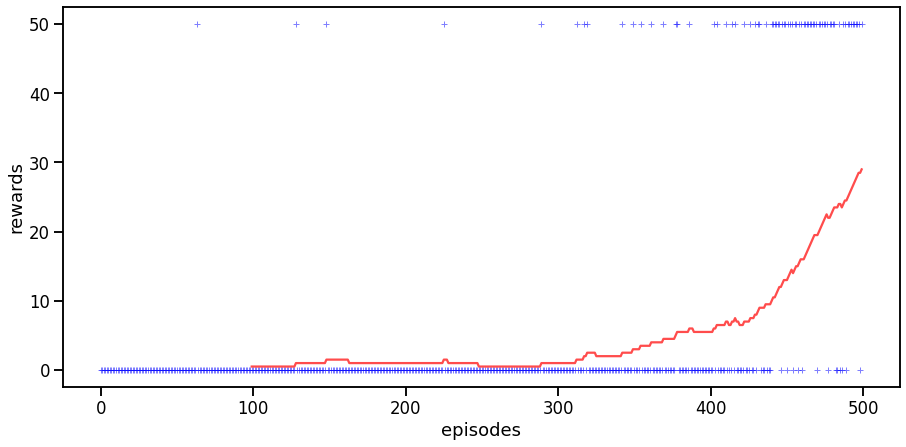

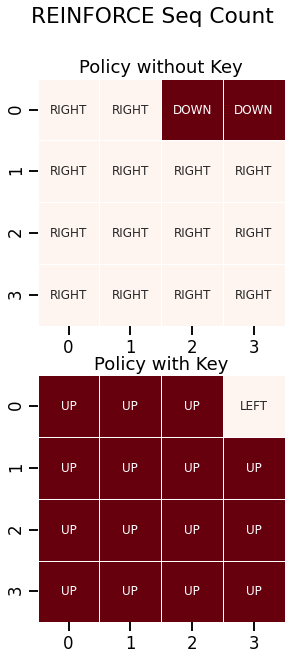

{(0,
  0,
  0): array([0.07729001, 0.06983213, 0.3515462 , 0.32845035, 0.17288134],
       dtype=float32),
 (0,
  0,
  1): array([0.3486183 , 0.4513587 , 0.0584885 , 0.05726626, 0.08426817],
       dtype=float32),
 (0,
  1,
  0): array([0.05591797, 0.05496461, 0.39614078, 0.3107799 , 0.18219675],
       dtype=float32),
 (0,
  1,
  1): array([0.30473635, 0.48653728, 0.06305405, 0.05536775, 0.09030466],
       dtype=float32),
 (0,
  2,
  0): array([0.04174924, 0.04594496, 0.43356222, 0.28917527, 0.18956831],
       dtype=float32),
 (0,
  2,
  1): array([0.25385842, 0.49970585, 0.07862868, 0.06020603, 0.10760113],
       dtype=float32),
 (0,
  3,
  0): array([0.03140976, 0.03898774, 0.4644493 , 0.26862472, 0.19652854],
       dtype=float32),
 (0,
  3,
  1): array([0.20202667, 0.46897602, 0.11269129, 0.07305185, 0.14325419],
       dtype=float32),
 (1,
  0,
  0): array([0.07209399, 0.06111499, 0.3501534 , 0.3427987 , 0.17383888],
       dtype=float32),
 (1,
  0,
  1): array([0.38846087, 0.

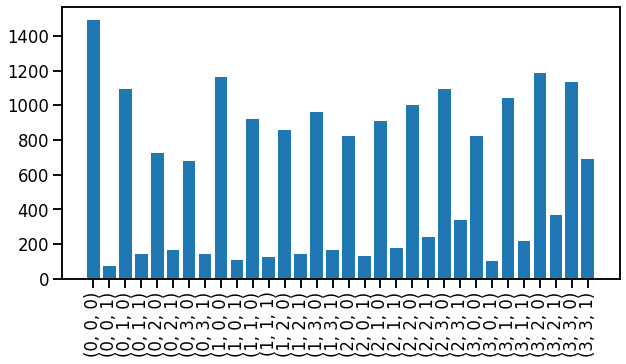

In [20]:
plot_scores(agent.scores)
agent.get_policy()
plot_policy(env, agent.pi, "REINFORCE Seq Count")
plot_state_freq(agent.state_freq)
agent.get_proba()

### Reinforce count staes + seq exploration

In [21]:
from rl_research.algorithms.reinforce_count_seq_states import train

In [22]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.22 0.18 0.18 0.21 0.2 ]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.21 0.19 0.19 0.21 0.2 ]
(0, 2, 0) probas:  [0.2  0.2  0.21 0.19 0.2 ]
(0, 2, 1) probas:  [0.21 0.19 0.2  0.2  0.2 ]
(0, 3, 0) probas:  [0.2  0.2  0.21 0.19 0.2 ]
(0, 3, 1) probas:  [0.21 0.19 0.2  0.2  0.2 ]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.21 0.18 0.18 0.22 0.21]
(1, 1, 0) probas:  [0.2  0.2  0.2  0.2  0.21]
(1, 1, 1) probas:  [0.21 0.19 0.18 0.21 0.2 ]
(1, 2, 0) probas:  [0.2  0.2  0.2  0.19 0.2 ]
(1, 2, 1) probas:  [0.21 0.19 0.19 0.21 0.2 ]
(1, 3, 0) probas:  [0.2  0.2  0.2  0.19 0.2 ]
(1, 3, 1) probas:  [0.21 0.19 0.2  0.2  0.2 ]
(2, 0, 0) probas:  [0.2  0.19 0.19 0.21 0.2 ]
(2, 0, 1) probas:  [0.21 0.18 0.18 0.22 0.21]
(2, 1, 0) probas:  [0.2  0.2  0.19 0.2  0.21]
(2, 1, 1

Score: 0
% of visited states: 93.8%

Iteration:  46
Score: 0
% of visited states: 93.8%

Iteration:  47
Score: 0
% of visited states: 93.8%

Iteration:  48
Score: 0
% of visited states: 93.8%

Iteration:  49
Score: 0
% of visited states: 93.8%

Iteration:  50
(0, 0, 0) probas:  [0.19 0.21 0.21 0.19 0.19]
(0, 0, 1) probas:  [0.21 0.22 0.2  0.19 0.18]
(0, 1, 0) probas:  [0.18 0.21 0.23 0.19 0.19]
(0, 1, 1) probas:  [0.21 0.22 0.21 0.19 0.18]
(0, 2, 0) probas:  [0.18 0.21 0.24 0.19 0.18]
(0, 2, 1) probas:  [0.2  0.22 0.22 0.18 0.17]
(0, 3, 0) probas:  [0.18 0.21 0.25 0.18 0.18]
(0, 3, 1) probas:  [0.2  0.22 0.23 0.18 0.17]
(1, 0, 0) probas:  [0.19 0.22 0.21 0.2  0.18]
(1, 0, 1) probas:  [0.21 0.22 0.19 0.19 0.18]
(1, 1, 0) probas:  [0.18 0.22 0.23 0.19 0.19]
(1, 1, 1) probas:  [0.21 0.23 0.2  0.19 0.18]
(1, 2, 0) probas:  [0.18 0.21 0.24 0.19 0.18]
(1, 2, 1) probas:  [0.2  0.23 0.21 0.19 0.17]
(1, 3, 0) probas:  [0.17 0.21 0.25 0.18 0.18]
(1, 3, 1) probas:  [0.19 0.23 0.23 0.18 0.17]
(2, 


Iteration:  94
Score: 0
% of visited states: 100.0%

Iteration:  95
Score: 0
% of visited states: 100.0%

Iteration:  96
Score: 0
% of visited states: 100.0%

Iteration:  97
Score: 0
% of visited states: 100.0%

Iteration:  98
Score: 0
% of visited states: 100.0%

Iteration:  99
Score: 0
% of visited states: 100.0%

Iteration:  100
(0, 0, 0) probas:  [0.2  0.21 0.22 0.19 0.18]
(0, 0, 1) probas:  [0.23 0.22 0.19 0.19 0.16]
(0, 1, 0) probas:  [0.19 0.21 0.24 0.19 0.17]
(0, 1, 1) probas:  [0.22 0.22 0.21 0.19 0.16]
(0, 2, 0) probas:  [0.18 0.21 0.25 0.19 0.17]
(0, 2, 1) probas:  [0.21 0.23 0.22 0.19 0.16]
(0, 3, 0) probas:  [0.18 0.2  0.26 0.19 0.17]
(0, 3, 1) probas:  [0.21 0.22 0.24 0.18 0.15]
(1, 0, 0) probas:  [0.19 0.21 0.22 0.2  0.17]
(1, 0, 1) probas:  [0.23 0.23 0.19 0.2  0.16]
(1, 1, 0) probas:  [0.18 0.21 0.24 0.2  0.17]
(1, 1, 1) probas:  [0.22 0.24 0.2  0.19 0.16]
(1, 2, 0) probas:  [0.18 0.21 0.25 0.19 0.17]
(1, 2, 1) probas:  [0.21 0.24 0.21 0.19 0.15]
(1, 3, 0) probas:  [0


Iteration:  145
Score: 0
% of visited states: 100.0%

Iteration:  146
Score: 0
% of visited states: 100.0%

Iteration:  147
Score: 0
% of visited states: 100.0%

Iteration:  148
Score: 0
% of visited states: 100.0%

Iteration:  149
Score: 0
% of visited states: 100.0%

Iteration:  150
(0, 0, 0) probas:  [0.2  0.21 0.23 0.2  0.17]
(0, 0, 1) probas:  [0.23 0.23 0.2  0.19 0.15]
(0, 1, 0) probas:  [0.19 0.21 0.25 0.19 0.17]
(0, 1, 1) probas:  [0.23 0.23 0.21 0.19 0.15]
(0, 2, 0) probas:  [0.18 0.2  0.26 0.19 0.16]
(0, 2, 1) probas:  [0.22 0.23 0.23 0.18 0.14]
(0, 3, 0) probas:  [0.18 0.2  0.28 0.18 0.16]
(0, 3, 1) probas:  [0.21 0.23 0.25 0.18 0.14]
(1, 0, 0) probas:  [0.19 0.21 0.23 0.2  0.16]
(1, 0, 1) probas:  [0.24 0.23 0.19 0.19 0.14]
(1, 1, 0) probas:  [0.18 0.21 0.25 0.2  0.17]
(1, 1, 1) probas:  [0.22 0.24 0.21 0.19 0.14]
(1, 2, 0) probas:  [0.18 0.2  0.27 0.19 0.16]
(1, 2, 1) probas:  [0.21 0.25 0.22 0.18 0.14]
(1, 3, 0) probas:  [0.17 0.2  0.28 0.19 0.16]
(1, 3, 1) probas:  [0.2


Iteration:  199
Score: 0
% of visited states: 100.0%

Iteration:  200
(0, 0, 0) probas:  [0.2  0.2  0.2  0.2  0.19]
(0, 0, 1) probas:  [0.26 0.23 0.16 0.19 0.17]
(0, 1, 0) probas:  [0.2  0.2  0.21 0.2  0.19]
(0, 1, 1) probas:  [0.26 0.23 0.16 0.18 0.17]
(0, 2, 0) probas:  [0.2  0.19 0.21 0.2  0.19]
(0, 2, 1) probas:  [0.25 0.24 0.17 0.17 0.17]
(0, 3, 0) probas:  [0.2  0.19 0.22 0.2  0.19]
(0, 3, 1) probas:  [0.25 0.23 0.18 0.17 0.16]
(1, 0, 0) probas:  [0.2  0.2  0.2  0.21 0.19]
(1, 0, 1) probas:  [0.26 0.23 0.15 0.19 0.17]
(1, 1, 0) probas:  [0.19 0.19 0.21 0.21 0.2 ]
(1, 1, 1) probas:  [0.26 0.24 0.16 0.18 0.17]
(1, 2, 0) probas:  [0.2  0.19 0.22 0.21 0.2 ]
(1, 2, 1) probas:  [0.25 0.25 0.16 0.18 0.16]
(1, 3, 0) probas:  [0.2  0.18 0.22 0.2  0.19]
(1, 3, 1) probas:  [0.25 0.24 0.17 0.17 0.16]
(2, 0, 0) probas:  [0.2  0.19 0.19 0.22 0.19]
(2, 0, 1) probas:  [0.26 0.23 0.15 0.19 0.17]
(2, 1, 0) probas:  [0.19 0.19 0.2  0.22 0.2 ]
(2, 1, 1) probas:  [0.26 0.24 0.15 0.19 0.16]
(2, 2, 0)

Score: 0
% of visited states: 100.0%

Iteration:  255
Score: 0
% of visited states: 100.0%

Iteration:  256
Score: 0
% of visited states: 100.0%

Iteration:  257
Score: 0
% of visited states: 100.0%

Iteration:  258
Score: 0
% of visited states: 100.0%

Iteration:  259
Score: 0
% of visited states: 100.0%

Iteration:  260
(0, 0, 0) probas:  [0.2  0.18 0.22 0.2  0.19]
(0, 0, 1) probas:  [0.29 0.22 0.17 0.16 0.16]
(0, 1, 0) probas:  [0.2  0.17 0.24 0.2  0.19]
(0, 1, 1) probas:  [0.29 0.23 0.17 0.15 0.16]
(0, 2, 0) probas:  [0.2  0.17 0.25 0.19 0.19]
(0, 2, 1) probas:  [0.29 0.23 0.18 0.15 0.15]
(0, 3, 0) probas:  [0.2  0.16 0.26 0.19 0.19]
(0, 3, 1) probas:  [0.29 0.22 0.2  0.14 0.15]
(1, 0, 0) probas:  [0.19 0.17 0.22 0.21 0.2 ]
(1, 0, 1) probas:  [0.29 0.22 0.17 0.16 0.16]
(1, 1, 0) probas:  [0.19 0.16 0.24 0.21 0.2 ]
(1, 1, 1) probas:  [0.29 0.23 0.17 0.15 0.16]
(1, 2, 0) probas:  [0.19 0.15 0.26 0.2  0.2 ]
(1, 2, 1) probas:  [0.29 0.22 0.19 0.15 0.16]
(1, 3, 0) probas:  [0.19 0.15 0.

Score: 0
% of visited states: 100.0%

Iteration:  308
Score: 0
% of visited states: 100.0%

Iteration:  309
Score: 0
% of visited states: 100.0%

Iteration:  310
(0, 0, 0) probas:  [0.24 0.17 0.22 0.18 0.19]
(0, 0, 1) probas:  [0.37 0.21 0.14 0.11 0.16]
(0, 1, 0) probas:  [0.24 0.15 0.24 0.17 0.19]
(0, 1, 1) probas:  [0.37 0.22 0.15 0.1  0.16]
(0, 2, 0) probas:  [0.24 0.15 0.25 0.16 0.2 ]
(0, 2, 1) probas:  [0.37 0.22 0.15 0.09 0.16]
(0, 3, 0) probas:  [0.24 0.14 0.27 0.15 0.2 ]
(0, 3, 1) probas:  [0.38 0.21 0.17 0.09 0.16]
(1, 0, 0) probas:  [0.24 0.15 0.21 0.19 0.2 ]
(1, 0, 1) probas:  [0.38 0.2  0.14 0.11 0.17]
(1, 1, 0) probas:  [0.23 0.14 0.23 0.18 0.21]
(1, 1, 1) probas:  [0.39 0.21 0.14 0.1  0.16]
(1, 2, 0) probas:  [0.23 0.13 0.25 0.17 0.22]
(1, 2, 1) probas:  [0.39 0.21 0.15 0.09 0.16]
(1, 3, 0) probas:  [0.23 0.13 0.26 0.16 0.22]
(1, 3, 1) probas:  [0.38 0.2  0.16 0.09 0.17]
(2, 0, 0) probas:  [0.24 0.14 0.21 0.2  0.21]
(2, 0, 1) probas:  [0.39 0.19 0.14 0.11 0.17]
(2, 1, 0) 


Iteration:  355
Score: 50
% of visited states: 100.0%

Iteration:  356
Score: 0
% of visited states: 100.0%

Iteration:  357
Score: 50
% of visited states: 100.0%

Iteration:  358
Score: 50
% of visited states: 100.0%

Iteration:  359
Score: 0
% of visited states: 100.0%

Iteration:  360
(0, 0, 0) probas:  [0.18 0.16 0.24 0.22 0.2 ]
(0, 0, 1) probas:  [0.38 0.3  0.11 0.08 0.13]
(0, 1, 0) probas:  [0.17 0.15 0.28 0.2  0.2 ]
(0, 1, 1) probas:  [0.37 0.32 0.12 0.08 0.12]
(0, 2, 0) probas:  [0.16 0.14 0.3  0.19 0.2 ]
(0, 2, 1) probas:  [0.37 0.33 0.12 0.07 0.11]
(0, 3, 0) probas:  [0.15 0.14 0.33 0.18 0.2 ]
(0, 3, 1) probas:  [0.36 0.33 0.13 0.07 0.11]
(1, 0, 0) probas:  [0.17 0.14 0.24 0.23 0.22]
(1, 0, 1) probas:  [0.39 0.29 0.11 0.08 0.13]
(1, 1, 0) probas:  [0.14 0.12 0.28 0.23 0.23]
(1, 1, 1) probas:  [0.37 0.32 0.11 0.07 0.12]
(1, 2, 0) probas:  [0.13 0.12 0.31 0.21 0.23]
(1, 2, 1) probas:  [0.36 0.33 0.12 0.07 0.12]
(1, 3, 0) probas:  [0.13 0.12 0.33 0.2  0.23]
(1, 3, 1) probas:  [

Score: 50
% of visited states: 100.0%

Iteration:  406
Score: 50
% of visited states: 100.0%

Iteration:  407
Score: 0
% of visited states: 100.0%

Iteration:  408
Score: 50
% of visited states: 100.0%

Iteration:  409
Score: 50
% of visited states: 100.0%

Iteration:  410
(0, 0, 0) probas:  [0.18 0.1  0.23 0.3  0.19]
(0, 0, 1) probas:  [0.62 0.31 0.02 0.02 0.03]
(0, 1, 0) probas:  [0.13 0.09 0.29 0.3  0.2 ]
(0, 1, 1) probas:  [0.59 0.34 0.02 0.02 0.02]
(0, 2, 0) probas:  [0.11 0.08 0.33 0.28 0.19]
(0, 2, 1) probas:  [0.57 0.37 0.02 0.02 0.02]
(0, 3, 0) probas:  [0.1  0.07 0.38 0.27 0.19]
(0, 3, 1) probas:  [0.55 0.37 0.03 0.02 0.02]
(1, 0, 0) probas:  [0.15 0.08 0.23 0.34 0.2 ]
(1, 0, 1) probas:  [0.63 0.3  0.02 0.02 0.03]
(1, 1, 0) probas:  [0.11 0.07 0.27 0.34 0.21]
(1, 1, 1) probas:  [0.6  0.33 0.02 0.02 0.02]
(1, 2, 0) probas:  [0.08 0.06 0.33 0.32 0.21]
(1, 2, 1) probas:  [0.58 0.36 0.02 0.02 0.02]
(1, 3, 0) probas:  [0.07 0.05 0.38 0.3  0.2 ]
(1, 3, 1) probas:  [0.55 0.38 0.03 0

(0, 2, 0) probas:  [0.07 0.06 0.41 0.21 0.25]
(0, 2, 1) probas:  [0.43 0.51 0.02 0.01 0.02]
(0, 3, 0) probas:  [0.06 0.05 0.46 0.19 0.25]
(0, 3, 1) probas:  [0.4  0.53 0.03 0.01 0.03]
(1, 0, 0) probas:  [0.1  0.07 0.28 0.29 0.26]
(1, 0, 1) probas:  [0.53 0.41 0.02 0.02 0.03]
(1, 1, 0) probas:  [0.07 0.05 0.34 0.26 0.28]
(1, 1, 1) probas:  [0.48 0.46 0.02 0.01 0.02]
(1, 2, 0) probas:  [0.05 0.04 0.4  0.22 0.28]
(1, 2, 1) probas:  [0.42 0.52 0.02 0.01 0.02]
(1, 3, 0) probas:  [0.04 0.04 0.45 0.2  0.27]
(1, 3, 1) probas:  [0.38 0.55 0.03 0.01 0.03]
(2, 0, 0) probas:  [0.09 0.06 0.27 0.3  0.28]
(2, 0, 1) probas:  [0.55 0.39 0.02 0.02 0.03]
(2, 1, 0) probas:  [0.06 0.04 0.32 0.28 0.3 ]
(2, 1, 1) probas:  [0.49 0.45 0.02 0.02 0.03]
(2, 2, 0) probas:  [0.04 0.03 0.38 0.24 0.31]
(2, 2, 1) probas:  [0.42 0.51 0.02 0.02 0.03]
(2, 3, 0) probas:  [0.03 0.03 0.43 0.21 0.31]
(2, 3, 1) probas:  [0.36 0.54 0.04 0.02 0.04]
(3, 0, 0) probas:  [0.08 0.05 0.26 0.32 0.3 ]
(3, 0, 1) probas:  [0.56 0.37 0.02


Iteration:  492
Score: 50
% of visited states: 100.0%

Iteration:  493
Score: 50
% of visited states: 100.0%

Iteration:  494
Score: 50
% of visited states: 100.0%

Iteration:  495
Score: 50
% of visited states: 100.0%

Iteration:  496
Score: 50
% of visited states: 100.0%

Iteration:  497
Score: 50
% of visited states: 100.0%

Iteration:  498
Score: 50
% of visited states: 100.0%

Iteration:  499
Score: 0
% of visited states: 100.0%

****************************************************************************************************
TRAINING ENDED



<Figure size 720x360 with 0 Axes>

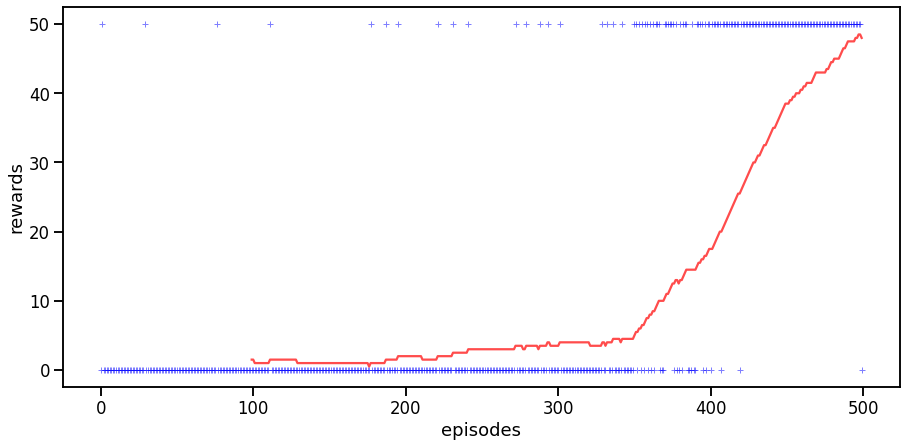

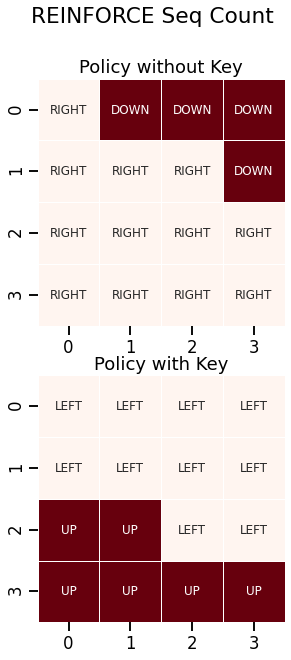

{(0,
  0,
  0): array([0.09584605, 0.07469977, 0.33087716, 0.2977752 , 0.20080182],
       dtype=float32),
 (0,
  0,
  1): array([0.56073624, 0.37901616, 0.02132751, 0.01765258, 0.02126755],
       dtype=float32),
 (0,
  1,
  0): array([0.06648859, 0.06012389, 0.40054277, 0.27370948, 0.19913524],
       dtype=float32),
 (0,
  1,
  1): array([0.50483626, 0.43912503, 0.02202915, 0.01476452, 0.019245  ],
       dtype=float32),
 (0,
  2,
  0): array([0.05109562, 0.05164521, 0.4600755 , 0.24580923, 0.19137442],
       dtype=float32),
 (0,
  2,
  1): array([0.45577642, 0.48530835, 0.0255622 , 0.01410018, 0.0192529 ],
       dtype=float32),
 (0,
  3,
  0): array([0.03954341, 0.04416578, 0.51193935, 0.22150168, 0.18284976],
       dtype=float32),
 (0,
  3,
  1): array([0.41414744, 0.51276803, 0.03511384, 0.01584169, 0.02212902],
       dtype=float32),
 (1,
  0,
  0): array([0.07830442, 0.05867764, 0.31882796, 0.33313864, 0.21105134],
       dtype=float32),
 (1,
  0,
  1): array([0.58427703, 0.

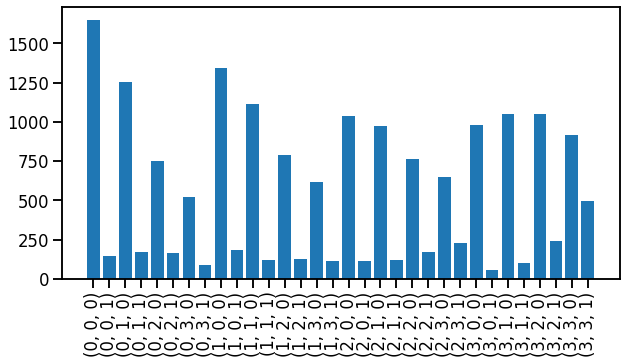

In [24]:
plot_scores(agent.scores)
agent.get_policy()
plot_policy(env, agent.pi, "REINFORCE Seq Count")
plot_state_freq(agent.state_freq)
agent.get_proba()